In [1]:
import pandas as pd  # Data Manipulation
import numpy as np # Operasi Matematik
import re  # Regex
import warnings  # Manage warnings
import nltk  # NLP Library
# import matplotlib as plt # Plot
import matplotlib.pyplot  as plt
from tqdm import tqdm
import pickle

from nltk.corpus import stopwords  # Stopword
from nltk.tokenize import word_tokenize  # Tokenization
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF Vectorizer
from sklearn.model_selection import train_test_split # Split Data
from sklearn.feature_selection import chi2 # Chi Square Function
from sklearn.feature_selection import SelectKBest # Feature Selection
from sklearn.svm import LinearSVC # LinearSVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix # Classification Report and Confusion Matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from gensim.models import Word2Vec, KeyedVectors
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import Sequential
from keras.layers import LSTM



warnings.filterwarnings("ignore") # Untuk Mengabaikan Warnings

In [2]:
df = pd.read_csv('Data_latih.csv')  
df.head()

ID  label    tanggal                                              judul  \
0   71      1  17-Aug-20  Pemakaian Masker Menyebabkan Penyakit Legionna...   
1  461      1  17-Jul-20  Instruksi Gubernur Jateng tentang penilangan  ...   
2  495      1  13-Jul-20  Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3  550      1   8-Jul-20  ini bukan politik, tapi kenyataan Pak Jokowi b...   
4  681      1  24-Jun-20       Foto Kadrun kalo lihat foto ini panas dingin   

                                              narasi nama file gambar  
0  A caller to a radio talk show recently shared ...           71.jpg  
1  Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...          461.png  
2  Jokowi adalah presiden terbaik dlm sejarah ban...          495.png  
3  Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...          550.png  
4        Kadrun kalo lihat foto ini panas dingin . .          681.jpg

In [3]:
df = df[['judul', 'label']]
df

judul  label
0     Pemakaian Masker Menyebabkan Penyakit Legionna...      1
1     Instruksi Gubernur Jateng tentang penilangan  ...      1
2     Foto Jim Rohn: Jokowi adalah presiden terbaik ...      1
3     ini bukan politik, tapi kenyataan Pak Jokowi b...      1
4          Foto Kadrun kalo lihat foto ini panas dingin      1
...                                                 ...    ...
4226  : KPK Dilarang Membawa Brimob Bersenjata Masuk...      1
4227            Foto pejabat keuangan dibawah palu arit      1
4228  Gambar Denny Siregar Musuh Warga Tasikmalaya d...      1
4229  Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...      1
4230  Laser dari termometer gun akan merusak struktu...      1

[4231 rows x 2 columns]

In [4]:
true_news = df[df['label']==0]
type(true_news)

pandas.core.frame.DataFrame

In [5]:
fake_news = df[df['label']==1].sample(n=766, random_state=42)
type(fake_news)

pandas.core.frame.DataFrame

In [6]:
merging = [true_news,fake_news]
balanced_df = pd.concat(merging)
balanced_df

judul  label
19         Sandi Sarankan Warga Ngadu ke Kelurahan Saja      0
21    Irina, Istri Ahli IT Hermansyah disebut Mantan...      0
22    Nezar Patria adalah Kader PKI, Ikut Rapat Seti...      0
55    Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...      0
58    Kronologis Polisi Berondong Sedan Terobos Razi...      0
...                                                 ...    ...
1266               Data menunjukkan ACEH hanya 1 korban      1
3773                             jelaslah, siapa mereka      1
4125  Foto Fatimah Aynur, Muslimah cantik Uyghur yan...      1
952   Foto 1 Agustus 2020, jutaan warga Jerman turun...      1
924                       GUDANG SENJATA ISRAEL MELEDAK      1

[1532 rows x 2 columns]

In [7]:
df_cb = pd.read_csv('primary-dataset.csv')
df_cb

text  label
0     Purnomo Serahkan Surat Mundur dari Pilkada  ke...      0
1     Pemkot Bekasi Teken Aturan Tempat Hiburan Menu...      0
2     New Normal 5 Juni, ASN Tak Mesti Berbondong-bo...      0
3     WHO Waspadai Banyak Kematian di Puncak Kedua P...      0
4                      VIDEO: Trump Ancam Tutup Twitter      1
...                                                 ...    ...
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0

[3237 rows x 2 columns]

In [8]:
df_cb = df_cb.rename(columns={'text': 'judul'})
df_cb

judul  label
0     Purnomo Serahkan Surat Mundur dari Pilkada  ke...      0
1     Pemkot Bekasi Teken Aturan Tempat Hiburan Menu...      0
2     New Normal 5 Juni, ASN Tak Mesti Berbondong-bo...      0
3     WHO Waspadai Banyak Kematian di Puncak Kedua P...      0
4                      VIDEO: Trump Ancam Tutup Twitter      1
...                                                 ...    ...
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0

[3237 rows x 2 columns]

In [9]:
#4769
frames = [balanced_df, df_cb]
merged_df = pd.concat(frames)

In [10]:
merged_df

judul  label
19         Sandi Sarankan Warga Ngadu ke Kelurahan Saja      0
21    Irina, Istri Ahli IT Hermansyah disebut Mantan...      0
22    Nezar Patria adalah Kader PKI, Ikut Rapat Seti...      0
55    Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...      0
58    Kronologis Polisi Berondong Sedan Terobos Razi...      0
...                                                 ...    ...
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0

[4769 rows x 2 columns]

In [11]:
def clean_sentence(sentence):
    sentence = re.sub(r"[^A-Za-z()0-9,!?\'\`]", " ", sentence)
    sentence = re.sub(r"\'s", " \'s", sentence)
    sentence = re.sub(r"\'ve", " \'ve", sentence)
    sentence = re.sub(r"n\'t", " n\'t", sentence)
    sentence = re.sub(r"\n", "", sentence)
    sentence = re.sub(r"\'re", " \'re", sentence)
    sentence = re.sub(r"\'d", " \'d", sentence)
    sentence = re.sub(r"\'ll", " \'ll", sentence)
    sentence = re.sub(r",", " , ", sentence)
    sentence = re.sub(r"!", " ! ", sentence)
    sentence = re.sub(r"'", "", sentence)
    sentence = re.sub(r'""', "", sentence)
    sentence = re.sub(r"\(", "", sentence)
    sentence = re.sub(r"\)", "", sentence)
    sentence = re.sub(r"\?", " \? ", sentence)
    sentence = re.sub(r"\,", "", sentence)
    sentence = re.sub(r"\s{2,}", " ", sentence)
    sentence = sentence.lower()
    return sentence
  
merged_df["clean_judul"] = df["judul"].apply(lambda x: f"{clean_sentence(x)}")
merged_df

judul  label  \
19         Sandi Sarankan Warga Ngadu ke Kelurahan Saja      0   
21    Irina, Istri Ahli IT Hermansyah disebut Mantan...      0   
22    Nezar Patria adalah Kader PKI, Ikut Rapat Seti...      0   
55    Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...      0   
58    Kronologis Polisi Berondong Sedan Terobos Razi...      0   
...                                                 ...    ...   
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0   
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1   
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1   
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1   
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0   

                                            clean_judul  
19         sandi sarankan warga ngadu ke kelurahan saja  
21    irina istri ahli it hermansyah disebut mantan psk  
22    nezar patria adalah kader pki ikut rapat setia...  
55    coach indra sjafri saya pernah 1 tahun tak dig...  
58    kronologis polisi berondong sedan terobos razi...  
...                                                 ...  
3232  seperti inilah bentuk corona yang berhasil dif...  
3233  kapal rute banda aceh sabang distop karena vir...  
3234  video sindiran pedas sultan brunei darusalam k...  
3235  klarifikasi pihak keraton yogyakarta terkait i...  
3236      wamenag reuni 212 berpotensi menimbulkan dosa  

[4769 rows x 3 columns]

In [12]:
nltk.download('stopwords')
default_stop_words = nltk.corpus.stopwords.words('indonesian')
stopwords = set(default_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bagus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
merged_df['clean_judul'] = merged_df['clean_judul'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [15]:
merged_df

judul  label  \
19         Sandi Sarankan Warga Ngadu ke Kelurahan Saja      0   
21    Irina, Istri Ahli IT Hermansyah disebut Mantan...      0   
22    Nezar Patria adalah Kader PKI, Ikut Rapat Seti...      0   
55    Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...      0   
58    Kronologis Polisi Berondong Sedan Terobos Razi...      0   
...                                                 ...    ...   
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0   
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1   
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1   
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1   
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0   

                                            clean_judul  
19                 sandi sarankan warga ngadu kelurahan  
21            irina istri ahli it hermansyah mantan psk  
22    nezar patria kader pki rapat malam istana jam ...  
55                   coach indra sjafri 1 digaji ikhlas  
58    kronologis polisi berondong sedan terobos razi...  
...                                                 ...  
3232  bentuk corona berhasil difoto diperbesar ilmuw...  
3233   kapal rute banda aceh sabang distop virus corona  
3234  video sindiran pedas sultan brunei darusalam p...  
3235  klarifikasi keraton yogyakarta terkait isu pem...  
3236      wamenag reuni 212 berpotensi menimbulkan dosa  

[4769 rows x 3 columns]

In [16]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [17]:
merged_df['clean_judul'] = merged_df['clean_judul'].apply(lambda x: f"{stemmer.stem(x)}")

In [18]:
merged_df

judul  label  \
19         Sandi Sarankan Warga Ngadu ke Kelurahan Saja      0   
21    Irina, Istri Ahli IT Hermansyah disebut Mantan...      0   
22    Nezar Patria adalah Kader PKI, Ikut Rapat Seti...      0   
55    Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...      0   
58    Kronologis Polisi Berondong Sedan Terobos Razi...      0   
...                                                 ...    ...   
3232  Polisi Ungkap Sebelum Penyerangan di Green Lak...      0   
3233  Rupanya Ini Alasan Anak Buah John Key Bikin Ri...      1   
3234  5 Fakta John Kei, Godfather Jakarta Terlibat K...      1   
3235  Kemarin Malam Mencekam, Begini Suasana Terkini...      1   
3236  Ricuh di Green Lake City Diduga Disebabkan Mas...      0   

                                            clean_judul  
19                        sandi saran warga ngadu lurah  
21            irina istri ahli it hermansyah mantan psk  
22    nezar patria kader pki rapat malam istana jam ...  
55                     coach indra sjafri 1 gaji ikhlas  
58    kronologis polisi berondong sedan terobos razi...  
...                                                 ...  
3232       bentuk corona hasil foto besar ilmuwan india  
3233     kapal rute banda aceh sabang stop virus corona  
3234  video sindir pedas sultan brunei darusalam pre...  
3235  klarifikasi keraton yogyakarta kait isu pasang...  
3236              wamenag reuni 212 potensi timbul dosa  

[4769 rows x 3 columns]

In [19]:
merged_df['label'].value_counts()

0    2610
1    2159
Name: label, dtype: int64

In [20]:
x = merged_df['clean_judul']
label = merged_df['label']
tokenizer = Tokenizer()
fit_text = x
tokenizer.fit_on_texts(fit_text)
sequences = tokenizer.texts_to_sequences(x)
list_set_sequence = [list(dict.fromkeys(seq)) for seq in sequences]

print('Padding Data...')
padded = pad_sequences([list(list_set_sequence[i]) for i in range(len(list_set_sequence))], maxlen=200, padding='post', truncating='post', value=0)
print('[Padding Completed]\n')
padded

Padding Data...
[Padding Completed]



array([[  80,  728,   20, ...,    0,    0,    0],
       [2547,  158,  963, ...,    0,    0,    0],
       [2549, 2550,  357, ...,    0,    0,    0],
       ...,
       [   3, 1563, 6458, ...,    0,    0,    0],
       [   5, 2185,  462, ...,    0,    0,    0],
       [6460, 1318,  141, ...,    0,    0,    0]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(padded, label, test_size=0.2, random_state=42)
#y_train_tr = to_categorical(y_train, num_classes=3)
#y_test_tr = to_categorical(y_test, num_classes=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3815, 200) (3815,)
(954, 200) (954,)


In [22]:
w2v_model = Word2Vec.load('model/idwiki_word2vec_100_new_lower.model')
vectors = w2v_model.wv
w2v_weights = w2v_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

In [23]:
from keras.layers import Embedding
embedding_layer = Embedding(vocab_size,
                            output_dim = 100,
                            weights=[w2v_weights],
                            trainable=True)

In [24]:
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [25]:
def LSTMmodel(X_train, y_train,X_test, y_test):
  model = Sequential()

#PARAMETER OUTPUT DIMENSION
  model.add(embedding_layer) #parameter perlu diganti dimensi
  model.add(LSTM(100, return_sequences=False)) #BiLSTM #parameter perlu diganti dimensi
  #model.add(LSTM(100, return_sequences=False)) #LSTM #parameter perlu diganti dimensi

#PARAMETER DO
  model.add(Dropout(0.1))  #parameter perlu diganti DO
  model.add(Dense(1, activation='sigmoid'))  #parameter perlu diganti activation
  model.summary()

#PARAMETER LR
  #compile model
  adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999)  #parameter perlu diganti Learning Rate
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  #fit model
  history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=30, batch_size=256, verbose=1)
 
  #evaluate the model
  # scores = model.evaluate(X_test, y_test, verbose=1)
  # summarize history for accuracy
  plt.plot(history.history['loss'], label='loss') 
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()
  return history,model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         34154100  
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 34,234,601
Trainable params: 34,234,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
15/15 [==============================] - 17s 1s/step - loss: 0.7086 - accuracy: 0.5180 - val_loss: 0.6891 - val_accuracy: 0.5493
Epoch 2/30
15/15 [==================

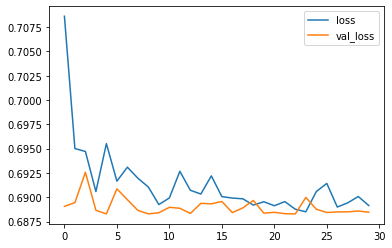

30/30 [==============================] - 1s 38ms/step - loss: 0.6885 - accuracy: 0.5493


In [26]:
history, train = LSTMmodel(X_train,y_train,X_test,y_test)
test = train.evaluate(x=X_test, y=y_test)

In [27]:
train.save('merged_model_30.h5')
filehandler = open(b"vocab.obj","wb")
pickle.dump(tokenizer,filehandler)